<a href="https://colab.research.google.com/github/vishnu-nitc/MDS-TASK2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=bf30c65e8ad4f5297c0bd5e786ce6088dee5f342cf0a92b69e704dd5136dcce0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
!wget https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip

--2023-09-26 06:03:46--  https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/item_listing_category.zip [following]
--2023-09-26 06:03:46--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/item_listing_category.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26084015 (25M) [application/zip]
Saving to: ‘item_listing_category.zip.1’

item_listing_catego 100%[===================>]  24.88M  --.-KB/s    in 0.08s   

2023-09-26 06:03:46 (301 MB/s) - ‘item_

In [5]:
!ls item_listing*

item_listing_category.zip  item_listing_category.zip.1


In [6]:
!unzip item_listing_category.zip

Archive:  item_listing_category.zip
  inflating: item_listing_category.csv  


In [7]:
!ls

item_listing_category.csv  item_listing_category.zip.1
item_listing_category.zip  sample_data


Question 1.1

Find the missing values:

• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

In [8]:
import pandas as pd


In [9]:
def missing_value_fn(df):
  missing_series = df.isna().sum()
  missing_columns = missing_series[missing_series.ne(0)]
  return missing_columns

In [10]:
df = pd.read_csv('item_listing_category.csv')

In [11]:
missing_value_fn(df)

category_name          1539
brand_name           151956
clean_description       194
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [13]:
df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [14]:
df['clean_description'].value_counts()

description yet                                                                                                                                                                                                                                                                                 19868
brand new                                                                                                                                                                                                                                                                                        1285
new                                                                                                                                                                                                                                                                                              1281
good condition                                                                                                        

In [15]:
df['brand_name'].value_counts()

PINK                 13376
Nike                 13182
Victoria's Secret    11544
LuLaRoe               7272
Apple                 3962
                     ...  
Cotton Express           1
Gold's Gym               1
Audi                     1
Alstyle Apparel          1
Doncaster                1
Name: brand_name, Length: 3046, dtype: int64

columns of missing values are object type . Can be imputed by mode of available values . Since all are object type , we can't use mean

Question 1.2

Find the price information from the data:

• Write code to print the median price of the items in the data;

• What is the 90th percentile value on the price;

• Draw the histogram chart for the price of the items in the data with 50 bins.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [17]:
df['price'].median()

17.0

In [18]:
df['price'].quantile(.9)

51.0

<Axes: >

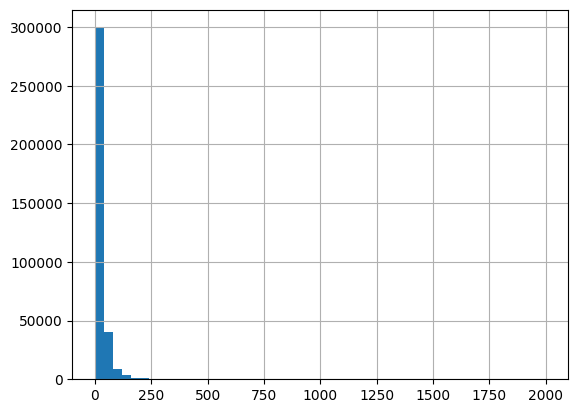

In [19]:
df['price'].hist(bins=50)


Question 1.3

Exploring the shipping information from the data:

• Write code to find out the percentage of the items that are paid by the buyers.

• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).

• When buying the items online, do you need to pay higher price if seller pays for the
shipping? Write the code to find out (Compare the median price of items paid by buyers
and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

In [20]:
df['shipping'].value_counts()

0    197064
1    158744
Name: shipping, dtype: int64

0 as Buyers
1 as Sellers

In [21]:
shiiping_series = df['shipping'].value_counts()


In [22]:
(shiiping_series[0] / (shiiping_series[0] + shiiping_series[1])) *100

55.38492670204155

In [23]:
import matplotlib.pyplot as plt

In [24]:
buyers_price = df[df['shipping']==0]['price']
sellers_price = df[df['shipping']==1]['price']

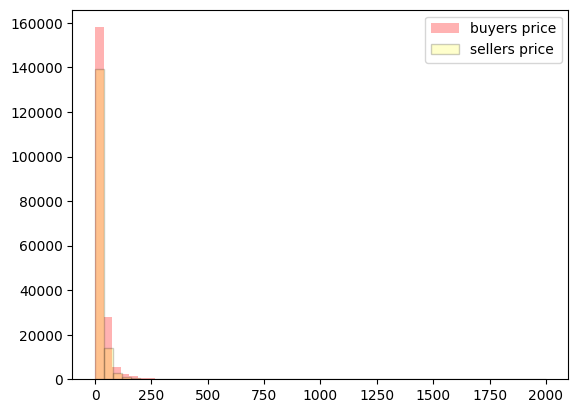

In [25]:
# plotting first histogram
plt.hist(buyers_price, label='buyers price', bins=50, alpha=.3, color='red')

# plotting second histogram
plt.hist(sellers_price, label="sellers price", bins=50, alpha=.2,
         edgecolor='black', color='yellow')
plt.legend()

# Showing the plot using plt.show()
plt.show()

In [26]:
buyers_price_median = buyers_price.median()
sellers_price_median = sellers_price.median()

In [27]:
print(f'{buyers_price_median=}')
print(f'{sellers_price_median=}')

buyers_price_median=19.0
sellers_price_median=14.0


Buyer is paying more than sellers

Question 1.4

You are required to find out the item condition information from the data. Lower the number
(value), the better condition of the item.

• Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.

• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price (draw the plot
and answer this question in the comment and report).


In [28]:
df['item_condition_id'].value_counts()

1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64

In [29]:
import seaborn as sns

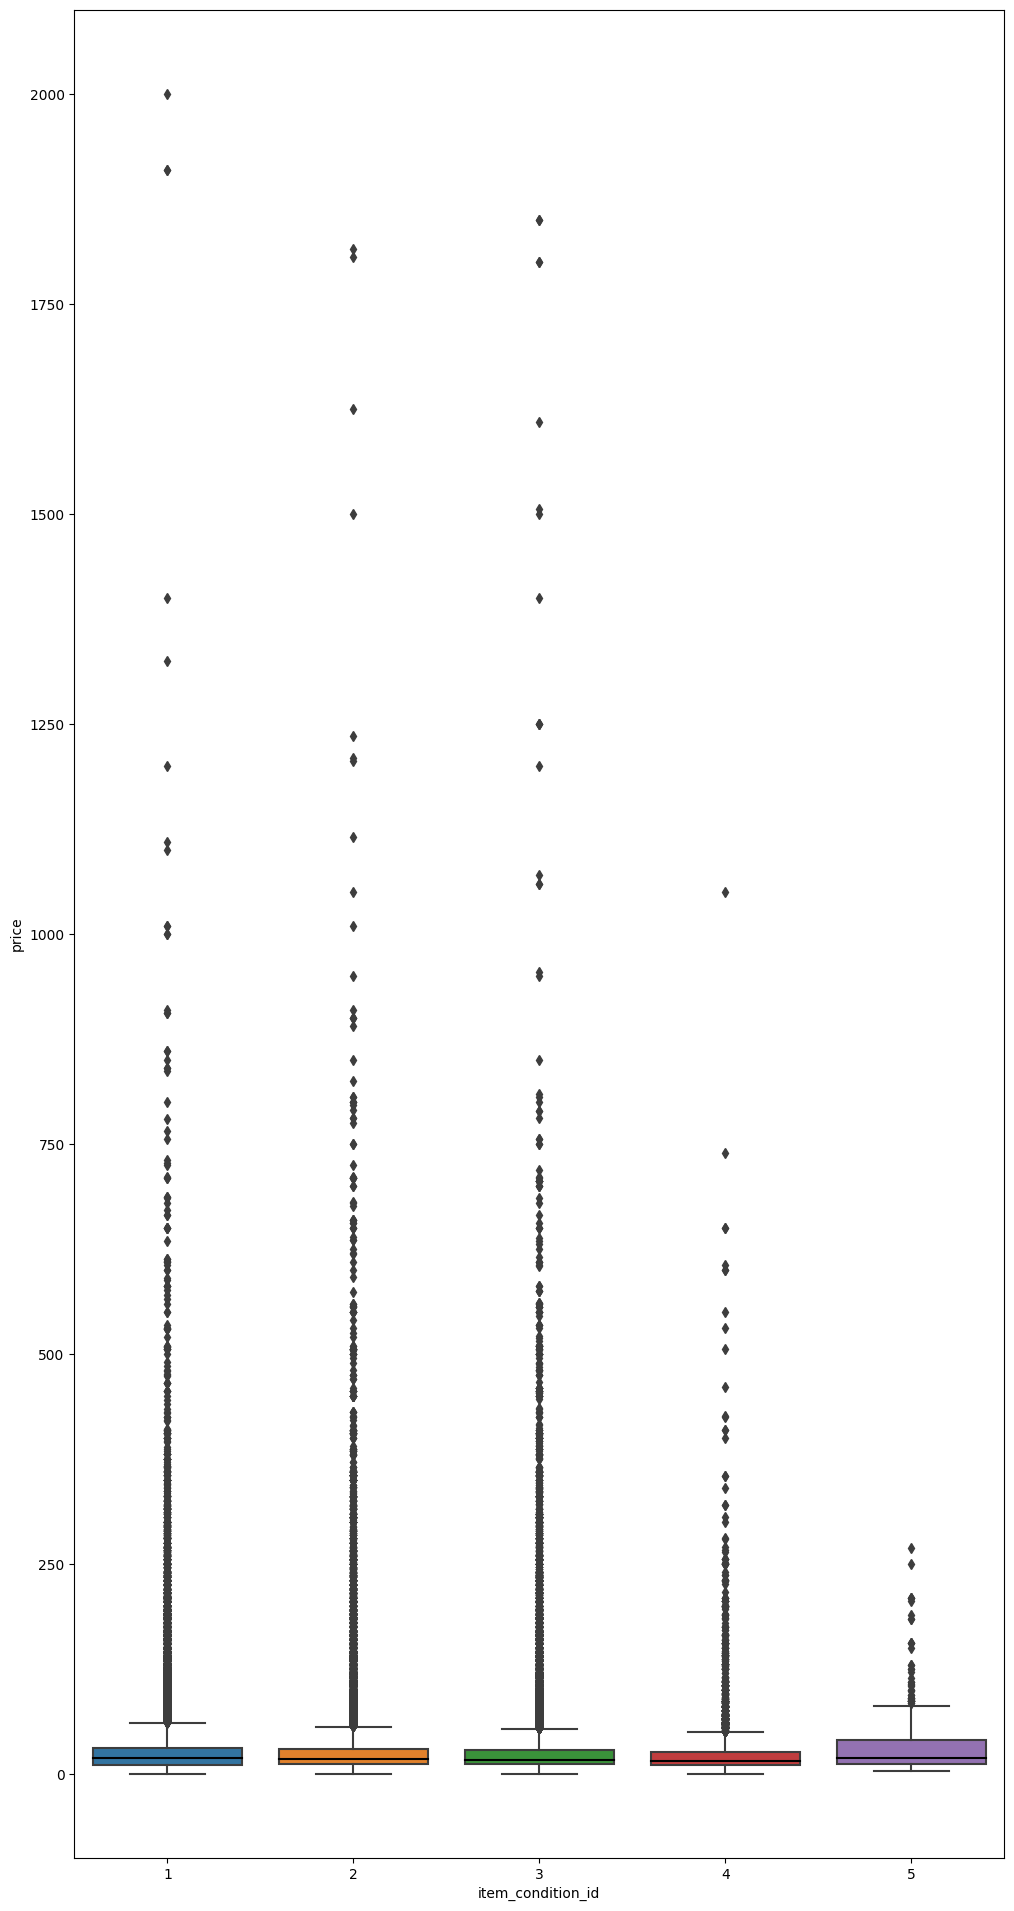

In [30]:
plt.figure(figsize=(12, 24))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

sns.boxplot(df , x='item_condition_id', y='price', palette=colors, medianprops={'color': 'black'})

plt.show()

In [31]:
df.groupby('item_condition_id')['price'].median()

item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

Question 1.5

Conduct the category analysis and find out the relevant information:


• Write the code to find out (print) how many unique categories you could find from column
category_name.

• For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories (now you probably understand the findings you had
in Question 1.4).

In [32]:
df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [33]:
len(df['category_name'].value_counts())

1135

There are 1135 category names are there

In [37]:
df[df['item_condition_id'] == 5]['category_name'].value_counts()[0:3]

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64